In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
import random
import glob

In [17]:
#24 sites
file_name = '2023_02_21*L24.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23/'+file_name))
data_path

['C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23\\2023_02_21_22_16_50_224L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23\\2023_02_21_22_16_50_403L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23\\2023_02_21_22_16_50_428L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23\\2023_02_21_22_16_50_513L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_22_23\\2023_02_21_22_16_53_270L24.npy']

In [18]:
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [19]:
data[0]['params']

{'dirc': '/n/home09/nd7ryw/holyholyscratch/tenpy_data/',
 'L': 24,
 'Omega': 1.55,
 'U': 14.240833333333333,
 'chi': 128,
 'N_steps': 1,
 'Rabi_ramp_time': 2.0,
 'Rabi_ramp_dt': 0.1,
 'T_DiLILA': 8.0,
 'Gap_init': 5.23,
 'Gap_crit': 0.355,
 'Gap_final': 3.02,
 'Delta_ini': -5.0,
 'Delta_crit': 1.65,
 'Delta_fin': 4.54,
 'tinflect': 5.0,
 'auto_tinflect': 0.0,
 'dt': 0.052,
 'random_U': array([135.90529819,  58.55928706,  74.14158662, 108.07078728,
         42.22300526, 127.98848471,  72.06813547, 137.0991034 ,
         47.62654463, 105.30618575,  79.98494896,  49.88849134,
        132.9522011 , 123.8415824 ,  49.1345091 ,  66.97875537,
         76.84335631, 148.78582807,  76.90618816,  75.20972813,
         77.47167484,  92.61415143,  41.02920006, 146.83804063])}

In [20]:
selected_data = []
for i in range(len(data)):
    if len(data[i]['nT'])>100: #and np.array(data[i]['nT'])[:,3][-1]>4.5:
        selected_data.append(data[i])
# # del selected_data[1] #get rid of the uncompleted data
# # del selected_data[-1] #get rid of the uncompleted data

selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['Delta_crit'])   # sort by age

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print(zzg_list[i].shape)

i 0
(174, 24, 24)
i 1
(174, 24, 24)
i 2
(174, 24, 24)
i 3
(174, 24, 24)
i 4
(174, 24, 24)


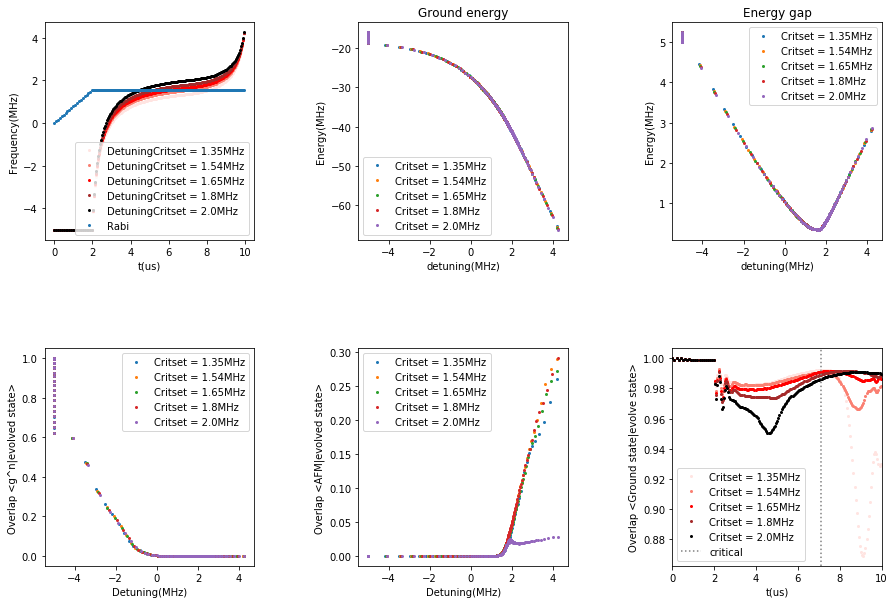

In [21]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown','black']
for i in range(len(N)):
    label0 ='Critset = '+ str((selected_data[i]['params']['Delta_crit']))+'MHz'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 ,color = color_list[i])
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0,color = color_list[i])
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

ax[1,2].set_xlim([0,10])


ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



In [22]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

In [23]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 ='V = '+ str(int(selected_data[i]['params']['U']))+'MHz'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][20]))
    print('intial_gap'+str(gap[20]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))

          
        

i = 0
V = 14MHz
intial_detuning-5.0
intial_gap5.250640371465855
crit_id  141
crit_t8.29199999999997
crit_detuning1.610489992558057
crit_gap0.3457711763481288
final_detuning4.181460254089308
final_gap2.8003151431751934
i = 1
V = 14MHz
intial_detuning-5.0
intial_gap5.250641706065856
crit_id  127
crit_t7.563999999999974
crit_detuning1.6194845532715578
crit_gap0.3456966212791623
final_detuning4.2028152859774055
final_gap2.822162229424266
i = 2
V = 14MHz
intial_detuning-5.0
intial_gap5.250641706065856
crit_id  110
crit_t6.679999999999981
crit_detuning1.6192785685237885
crit_gap0.3456948824857704
final_detuning4.215178725491568
final_gap2.83480535194905
i = 3
V = 14MHz
intial_detuning-5.0
intial_gap5.250641706065856
crit_id  88
crit_t5.53599999999999
crit_detuning1.6141221269657589
crit_gap0.34570400907625815
final_detuning4.232037961192698
final_gap2.8520398470289705
i = 4
V = 14MHz
intial_detuning-5.0
intial_gap5.250641706065856
crit_id  72
crit_t4.703999999999996
crit_detuning1.6185358026

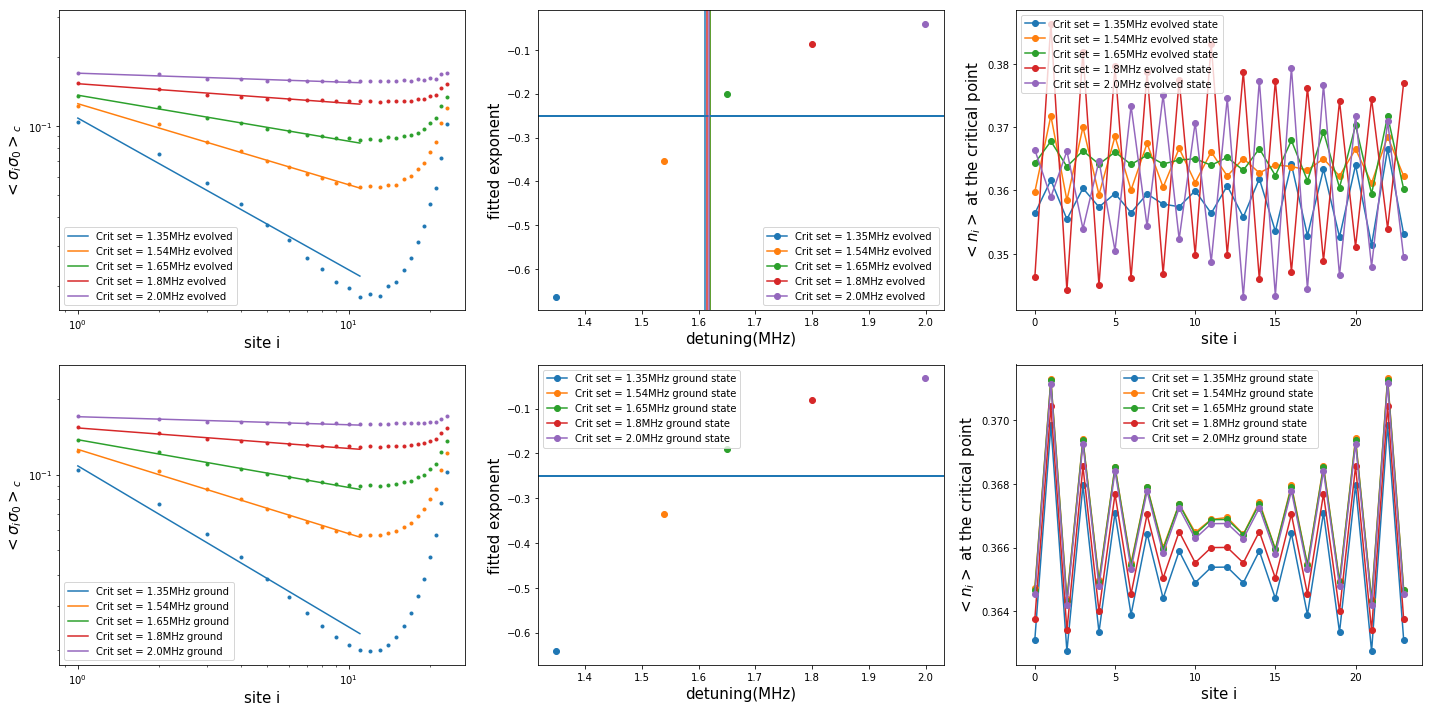

In [26]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning = 1.3
final_detuning = 2.1
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(len(N))):
    label0 ='Crit set = '+ str((selected_data[i]['params']['Delta_crit']))+'MHz'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    temp = selected_data[i]['params']['Delta_crit']
#     initial_id = np.argmin(abs(detuning[i]-intial_detuning))
#     final_id = np.argmin(abs(detuning[i]-final_detuning))
    initial_id = np.argmin(abs(detuning[i]-temp))
    final_id = np.argmin(abs(detuning[i]-temp))+1
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '',color='C%d'%i_n )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '',color='C%d'%i_n)
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(detuning[i][crit_id_list[i]],color = 'C%d'%i_n)
        ax[0,0].plot(xfit, yfit, '-',color='C%d'%i_n)
        ax[1,0].plot(xfit_g, yfit_g, '-',color='C%d'%i_n)

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
   # ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    #ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
 #   plt.suptitle('ground state',fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

Crit set, 1.35
Crit set, 1.54
Crit set, 1.65
Crit set, 1.8
Crit set, 2.0


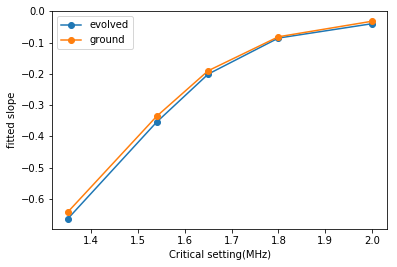

In [25]:
Critset_list = []
params_list = []
params_g_list = []
#fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(20,10))
for i in range(len(N)):
    this_critset = selected_data[i]['params']['Delta_crit']
    Critset_list.append(this_critset)
    print('Crit set,',this_critset)
    dataid = np.argmin(abs(detuning[i]-this_critset))
    #print(dataid)
    fit_range = int(N[i]/2-2)
    xdata = np.arange(1,fit_range)
    ydata = sigma_2_list[i][dataid,1:fit_range]
    ydata_g = sigma_2_g_list[i][dataid,1:fit_range]
    params, params_covariance= curve_fit(power_law, xdata, ydata)
    params_g, params_covariance_g= curve_fit(power_law, xdata, ydata_g)
    params_list.append(params[1])
    params_g_list.append(params_g[1])
    
#     print('evolved slope,',params[1])
#     print('evolved sigma correlator,',sigma_2_list[i][dataid])

#     print('ground slope,',params_g[1])
#     print('ground sigma correlator,',sigma_2_g_list[i][dataid])
plt.ylabel('fitted slope')
plt.xlabel('Critical setting(MHz)')
plt.plot(Critset_list,params_list,marker = 'o',label = 'evolved')
plt.plot(Critset_list,params_g_list,marker = 'o',label = 'ground')
plt.legend()

In [47]:
fit_range

10

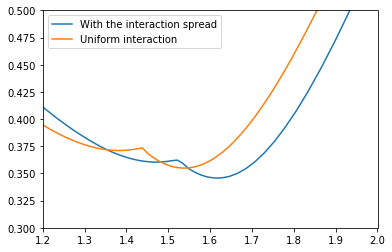

In [65]:
i = 0
plt.plot(detuning[i][20:],((E[i][:,2]-E[i][:,0])/2/np.pi)[20:],label = 'With the interaction spread')
plt.plot(tempdet[20:],tempgap[20:],label = 'Uniform interaction')
plt.xlim([1.2,2])
plt.ylim([0.3,0.5])
plt.legend()

In [58]:
tempdet = np.array([-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -4.16176334, -3.50261872, -2.97071033, -2.53243987,
        -2.16508147, -1.85271288, -1.58384677, -1.34998708, -1.14471492,
        -0.96309032, -0.8012495 , -0.65612694, -0.52525937, -0.40664477,
        -0.29863924, -0.19988039, -0.10922949, -0.02572745,  0.05143931,
         0.12296542,  0.18944755,  0.25140107,  0.30927346,  0.36345512,
         0.4142882 ,  0.46207382,  0.50707805,  0.54953686,  0.58966027,
         0.62763579,  0.66363142,  0.69779804,  0.7302716 ,  0.76117492,
         0.79061918,  0.81870535,  0.84552526,  0.87116266,  0.89569407,
         0.91918955,  0.94171335,  0.96332454,  0.98407748,  1.00402229,
         1.02320529,  1.04166929,  1.05945399,  1.07659618,  1.09313008,
         1.10908749,  1.12449804,  1.13938938,  1.15378732,  1.16771596,
         1.1811979 ,  1.19425427,  1.20690492,  1.21916847,  1.23106242,
         1.24260323,  1.25380639,  1.26468652,  1.27525738,  1.28553197,
         1.29552259,  1.30524083,  1.3146977 ,  1.32390359,  1.33286836,
         1.34160137,  1.35011149,  1.35840714,  1.36649633,  1.37438667,
         1.38208541,  1.38959945,  1.39693534,  1.40409935,  1.41109746,
         1.41793535,  1.42461847,  1.43115201,  1.43754095,  1.44379002,
         1.44990378,  1.45588656,  1.46174254,  1.4674757 ,  1.47308987,
         1.47858871,  1.48397575,  1.48925434,  1.49442775,  1.49949908,
         1.50447132,  1.50934735,  1.51412993,  1.51882173,  1.5234253 ,
         1.52794312,  1.53432275,  1.542559  ,  1.55107785,  1.55989407,
         1.56902351,  1.57848319,  1.58829133,  1.59846755,  1.60903298,
         1.62001037,  1.6314243 ,  1.64330135,  1.65567026,  1.66856226,
         1.68201124,  1.69605408,  1.71073102,  1.72608599,  1.74216708,
         1.75902706,  1.77672391,  1.79532154,  1.8148905 ,  1.83550894,
         1.85726362,  1.8802511 ,  1.90457925,  1.93036886,  1.95775572,
         1.98689294,  2.01795387,  2.05113553,  2.08666279,  2.12479346,
         2.16582461,  2.21010026,  2.25802109,  2.31005658,  2.36676044,
         2.42879044,  2.49693395,  2.57214163,  2.65557199,  2.74865153,
         2.85315697,  2.97132975,  3.10603859,  3.26101548,  3.44120677,
         3.65331085,  3.90662927,  4.21446739,  4.59654839])
tempgap =  np.array([5.        , 5.0006029 , 5.00240884, 5.00542131, 5.00963364,
        5.0150301 , 5.02162082, 5.02937126, 5.03827696, 5.04831967,
        5.05948854, 5.07176809, 5.08514315, 5.09960611, 5.11512152,
        5.13168825, 5.1492791 , 5.16787059, 5.18744009, 5.20796852,
        5.22943206, 4.43377081, 3.8194433 , 3.33411684, 2.94363098,
        2.62465646, 2.36067713, 2.13966804, 1.9526825 , 1.79295244,
        1.65528943, 1.53567189, 1.43095233, 1.33864509, 1.25676999,
        1.18373592, 1.11825374, 1.05927023, 1.00591804, 0.95747726,
        0.91334594, 0.87301708, 0.83606083, 0.80211033, 0.77085061,
        0.74200966, 0.71535132, 0.69066949, 0.66778344, 0.64653397,
        0.62678022, 0.60839711, 0.5912731 , 0.57530841, 0.56041347,
        0.54650763, 0.53351805, 0.52137878, 0.51002997, 0.49941714,
        0.48949063, 0.48020505, 0.47151884, 0.4633939 , 0.45579521,
        0.44869053, 0.44205017, 0.4358467 , 0.43005475, 0.42465087,
        0.41961326, 0.41492173, 0.41055748, 0.406503  , 0.40274196,
        0.39925912, 0.39604021, 0.39307188, 0.39034159, 0.38783755,
        0.38554868, 0.38346451, 0.38157518, 0.37987135, 0.37834416,
        0.37698522, 0.37578656, 0.37474058, 0.37384004, 0.37307804,
        0.37244797, 0.37194352, 0.37155864, 0.37128753, 0.37112464,
        0.37106462, 0.37110233, 0.37123284, 0.37145142, 0.37175351,
        0.37213488, 0.3725939 , 0.37313905, 0.37345894, 0.37140558,
        0.36876089, 0.36689107, 0.36526115, 0.36377906, 0.36243604,
        0.36122534, 0.36014064, 0.35917582, 0.35832501, 0.35758253,
        0.35694302, 0.35640122, 0.35595219, 0.35559113, 0.35531348,
        0.35511484, 0.35495898, 0.35497337, 0.35524329, 0.35579437,
        0.35665421, 0.35785244, 0.3594208 , 0.3613932 , 0.36380578,
        0.36669698, 0.37010756, 0.37408069, 0.37866195, 0.38389945,
        0.38984386, 0.39654854, 0.40406969, 0.41246655, 0.42180162,
        0.43214102, 0.44355495, 0.45611815, 0.46991063, 0.48501844,
        0.50153467, 0.51956059, 0.53920707, 0.56059618, 0.58386317,
        0.60915876, 0.63665185, 0.66653281, 0.69901731, 0.73435103,
        0.77281532, 0.81473411, 0.86048237, 0.91049667, 0.96528836,
        1.02541515, 1.09169825, 1.16492685, 1.24613273, 1.33656945,
        1.43777458, 1.55165347, 1.68059349, 1.82762123, 1.99662045,
        2.19263371, 2.42227102, 2.69422098, 3.01971365])
